In [139]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np
import joblib

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
male = df[df['Gender'] == 'Male']

In [7]:
male

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [8]:
female = df[df['Gender'] == 'Female']

In [9]:
female

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
37,LP001112,Female,Yes,0,Graduate,No,3667,1459.0,144.0,360.0,1.0,Semiurban,Y
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
48,LP001146,Female,Yes,0,Graduate,No,2645,3440.0,120.0,360.0,0.0,Urban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,LP002917,Female,No,0,Not Graduate,No,2165,0.0,70.0,360.0,1.0,Semiurban,Y
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y


In [10]:
df['Gender'] = df['Gender'].fillna('Female')

In [14]:
df['Married'] = df['Married'].fillna('No')

In [17]:
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])


In [18]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])


In [19]:

df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())


In [21]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())



In [22]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

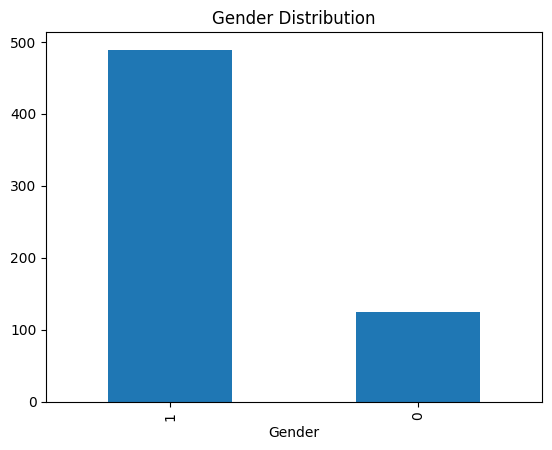

In [37]:
import matplotlib.pyplot as plt
df['Gender'].value_counts().plot(kind='bar', title='Gender Distribution')
plt.show()


In [67]:
le = LabelEncoder()

In [68]:
df['Gender'] = le.fit_transform(df['Gender'])

In [69]:
df['Married'] = le.fit_transform(df['Married'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

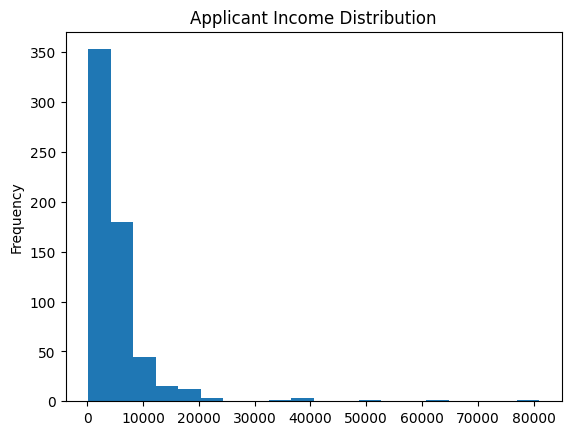

In [70]:
df['ApplicantIncome'].plot(kind='hist', bins=20, title='Applicant Income Distribution')
plt.show()


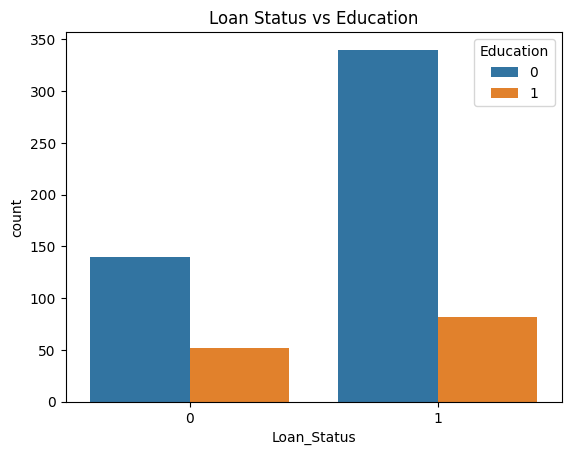

In [71]:
import seaborn as sns
sns.countplot(x='Loan_Status', hue='Education', data=df)
plt.title("Loan Status vs Education")
plt.show()


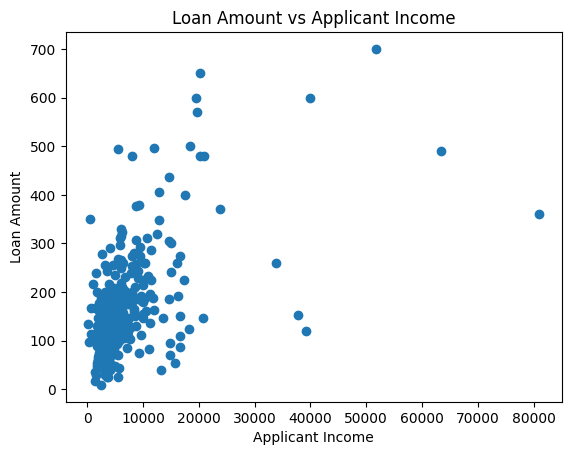

In [72]:
plt.scatter(df['ApplicantIncome'], df['LoanAmount'])
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.title("Loan Amount vs Applicant Income")
plt.show()


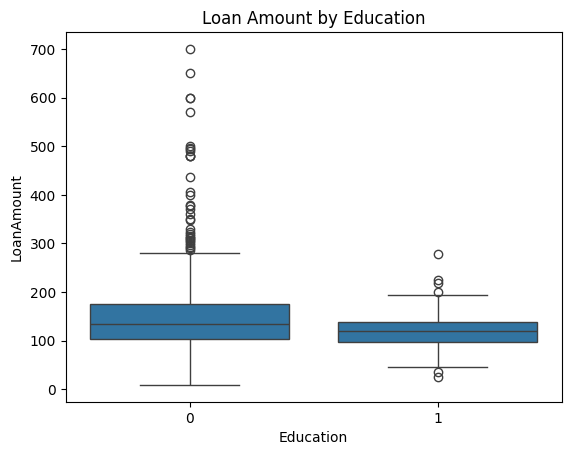

In [73]:
sns.boxplot(x='Education', y='LoanAmount', data=df)
plt.title("Loan Amount by Education")
plt.show()


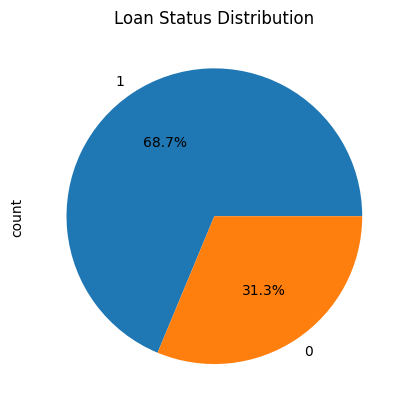

In [74]:
df['Loan_Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', title="Loan Status Distribution")
plt.show()


In [118]:
y_train= df['Loan_Status']
X_train = df.drop(['Loan_ID' , 'Property_Area' , 'Loan_Status' , 'Dependents'],axis = 1)

In [119]:
lr = LogisticRegression()

In [120]:
model = lr.fit(X_train,y_train)

In [121]:
y_pred = model.predict(X_train)

In [122]:
df1 = pd.read_csv("test.csv")

In [123]:
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [124]:
df1['Gender'] = le.fit_transform(df1['Gender'])
df1['Married'] = df1['Married'].fillna('No')
df1['Married'] = le.fit_transform(df1['Married'])
df1['Education'] = le.fit_transform(df1['Education'])
df1['Self_Employed'] = le.fit_transform(df1['Self_Employed'])

df1['Dependents'] = df1['Dependents'].replace('3+', 3).astype(float)
df1['Dependents'] = df1['Dependents'].fillna(df1['Dependents'].mean())

df1['LoanAmount'] = df1['LoanAmount'].fillna(df1['LoanAmount'].mean())

df1['Loan_Amount_Term'] = df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].mode()[0])

df1['Credit_History'] = df1['Credit_History'].fillna(df1['Credit_History'].mode()[0]).astype(int)


In [127]:
X_test = df1.drop(['Loan_ID' , 'Property_Area' , 'Dependents'],axis = 1)

In [128]:
y_pred = model.predict(X_test)

In [129]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [132]:
y_test = y_test.iloc[:X_test.shape[0]]


In [133]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Accuracy: 0.6539509536784741
Precision: 0.7032258064516129
Recall: 0.8616600790513834
F1 Score: 0.7744227353463587
RMSE: 0.5882593359408127


In [134]:

X_test = df1[model.feature_names_in_] 

y_pred = model.predict(X_test)

df1['Predicted_Loan_Status'] = y_pred


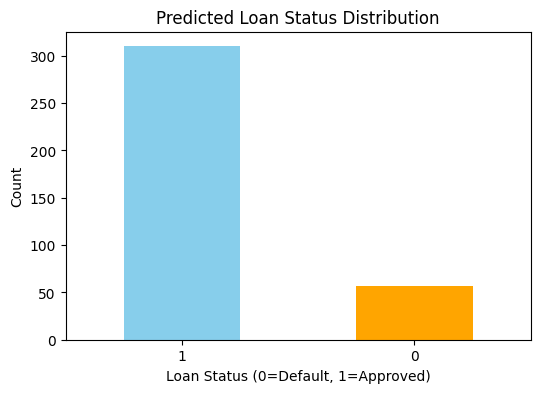

In [135]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
df1['Predicted_Loan_Status'].value_counts().plot(kind='bar', color=['skyblue','orange'])
plt.title("Predicted Loan Status Distribution")
plt.xlabel("Loan Status (0=Default, 1=Approved)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.savefig("predicted_loan_status.png")  # save figure
plt.show()


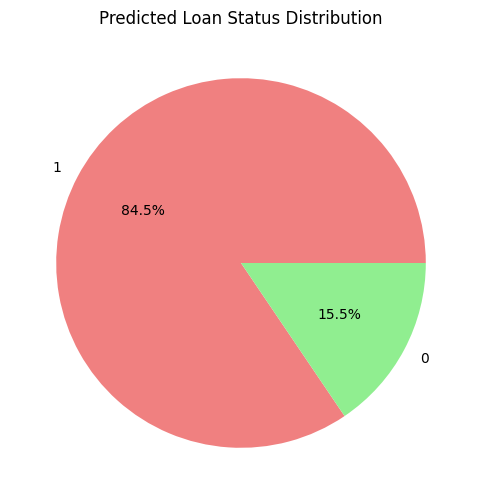

In [136]:
plt.figure(figsize=(6,6))
df1['Predicted_Loan_Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral','lightgreen'])
plt.title("Predicted Loan Status Distribution")
plt.ylabel('')
plt.savefig("predicted_loan_status_pie.png")
plt.show()


In [138]:
from sklearn.linear_model import LogisticRegression

# Example: train your model (replace X_train, y_train with your data)
model = LogisticRegression(max_iter=600)
model.fit(X_train, y_train)


LogisticRegression(max_iter=600)

In [140]:
joblib.dump(model, "loan_app/loan_prediction_model.pkl")


['loan_app/loan_prediction_model.pkl']